In [18]:
# Import all necessary libraries.
import numpy as np
from scipy.special import erfc
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

In [19]:
# Number of QPSK symbols to be transmitted.
N = 1000000

In [20]:
# Instantiate a Gaussian naive Bayes classifier for each one of the parts of a QPSK symbol.
gnb_re = GaussianNB()
gnb_im = GaussianNB()

In [65]:
# Create Es/N0 vector.
EsN0dB = np.arange(-2,22,2)

ser_simu = np.zeros(len(EsN0dB))
ser_theo = np.zeros(len(EsN0dB))
for idx in range(0,len(EsN0dB)):
    
    #print('Es/N0 dB:', EsN0dB[idx])
    
    EsN0Lin = 10.0**(-(EsN0dB[idx]/10.0))
    
    # Generate N QPSK symbols.
    ip =(2.0 * (np.random.rand(N) >= 0.5) - 1.0).reshape(N, 1) + 1j*(2.0 * (np.random.rand(N) >= 0.5) - 1.0).reshape(N, 1)
    # Normalization of energy to 1.
    #ip = (1/np.sqrt(2))*ip
    
    # Generate noise vector with unitary variance.
    noise = np.sqrt(1.0/2.0)*(np.random.randn(N, 1) + 1j*np.random.randn(N, 1))
    
    # Pass symbols through AWGN channel.
    y = ip + np.sqrt(EsN0Lin)*noise
    
    # Fit model for real part.
    s_re = ip.real
    y_re = y.real
    gnb_re.fit(y_re, s_re.ravel())
    
    # Fit model for imaginary parts.
    s_im = ip.imag
    y_im = y.imag
    gnb_im.fit(y_im, s_im.ravel())
    
    # Prediction for real part.
    detected_ip_re = gnb_re.predict(y_re).reshape(N, 1)
    # Prediction for imaginary part.
    detected_ip_im = gnb_im.predict(y_im).reshape(N, 1)
        
    # Simulated QPSK BER.
    error_re = (ip.real != detected_ip_re)
    error_im = (ip.imag != detected_ip_im)
    error = 0
    for i in range(0, N): 
        if(error_re[i]==True or error_im[i]==True): 
            error += 1
    
    ser_simu[idx] = 1.0 * error / N
    
    # Theoretical BPSK BER.    
    ser_theo[idx] = erfc( np.sqrt(  0.5*(10.0**(EsN0dB[idx]/10.0))   ) ) - (1/4)*(erfc(np.sqrt(0.5*(10.0**(EsN0dB[idx]/10.0)))))**2.0
   

Es/N0:-2 	- BER: 2.436120e-01
Es/N0:0 	- BER: 1.510090e-01
Es/N0:2 	- BER: 7.397700e-02
Es/N0:4 	- BER: 2.479600e-02
Es/N0:6 	- BER: 4.789000e-03
Es/N0:8 	- BER: 3.750000e-04
Es/N0:10 	- BER: 8.000000e-06
Es/N0:12 	- BER: 0.000000e+00
Es/N0:14 	- BER: 0.000000e+00
Es/N0:16 	- BER: 0.000000e+00
Es/N0:18 	- BER: 0.000000e+00
Es/N0:20 	- BER: 0.000000e+00

B.


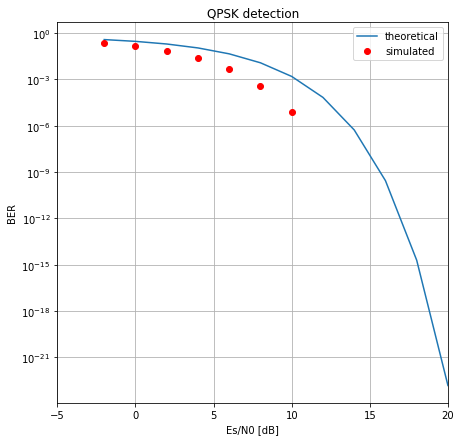

In [66]:
# Print Es/N0 versus BER values.
for i in range(0,len(ser_simu)): print('Es/N0:%d \t- BER: %e' % (EsN0dB[i], ser_simu[i]))

# Plot Es/N0 versus BER values.
print('\nB.')
fig = plt.figure(figsize=(7,7))
plt.plot(EsN0dB, ser_theo, label='theoretical')
plt.plot(EsN0dB, ser_simu, 'ro', label='simulated')
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('Es/N0 [dB]')
plt.ylabel('BER')
plt.grid(True)
plt.title('QPSK detection')
plt.legend()
plt.xlim([-5, 20])
#plt.ylim([1e-20, 1])
plt.savefig("bpsk_ber_curves.png", dpi=600)
plt.show()

In [67]:
print('C. A curva simulada se aproxima da curva teórica da SER mais tem uma leve diferenca')
print('\nD. Se as classes, ou seja, os símbolos, tivessem probabilidades diferentes, nós NÃO poderíamos dizer que o classificador ML é equivalente ao MAP. Para dizer isso as classes precisam ser equiprováveis e independentes do índice')

C. A curva simulada se aproxima da curva teórica da SER mais tem uma leve diferenca

D. Se as classes, ou seja, os símbolos, tivessem probabilidades diferentes, nós NÃO poderíamos dizer que o classificador ML é equivalente ao MAP. Para dizer isso as classes precisam ser equiprováveis e independentes do índice
